In [1]:
#Tratamiento
import numpy as np
import pandas as pd

#Grafico
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Modelo
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
iris = load_iris()
X = iris.data

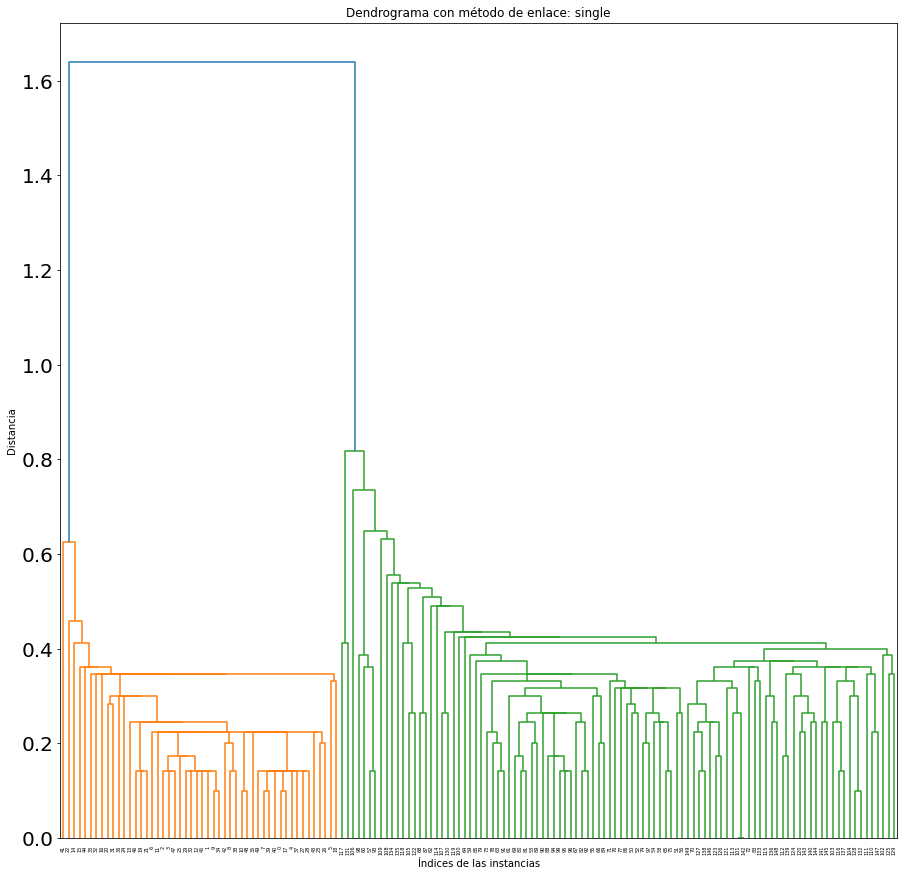

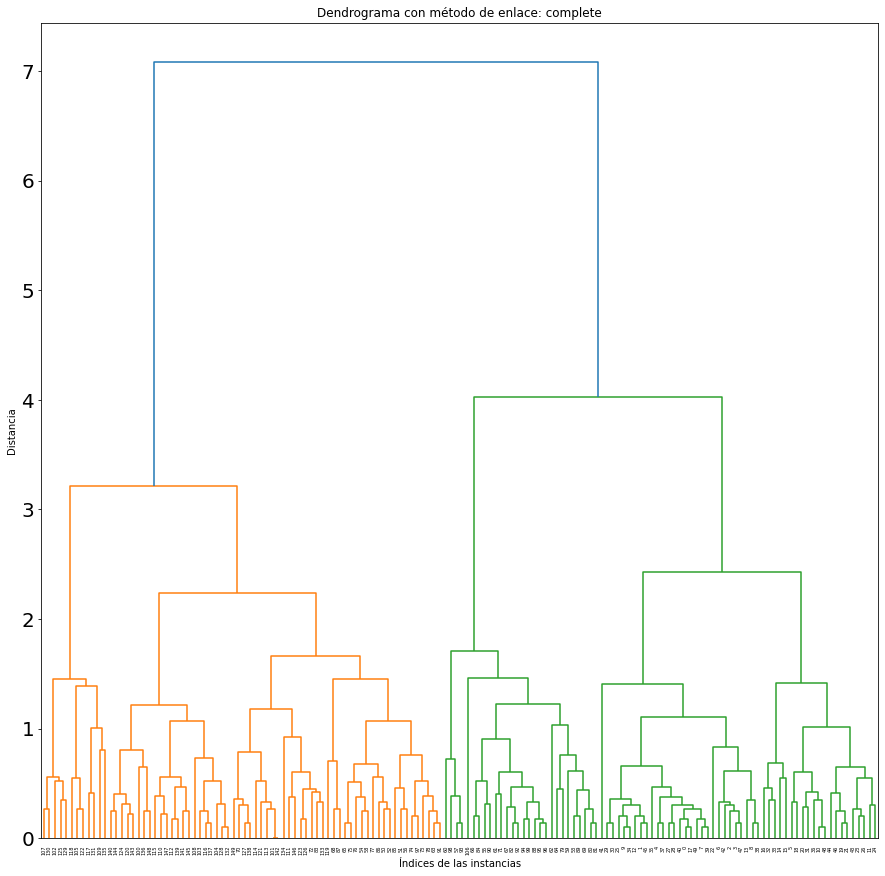

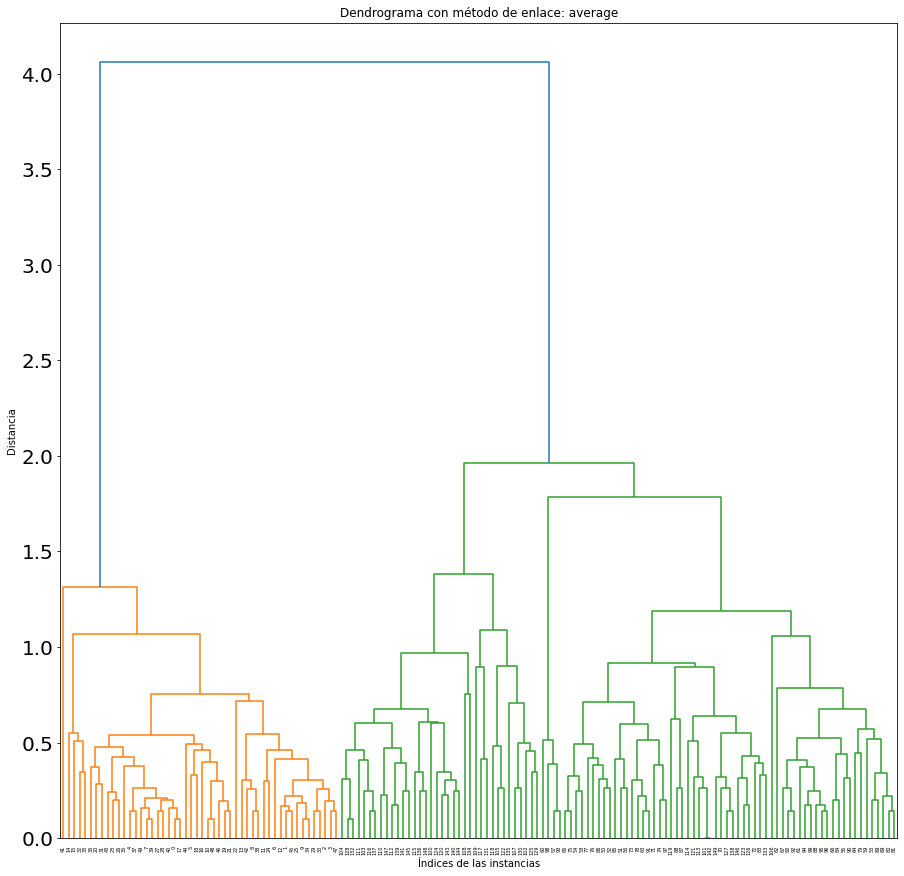

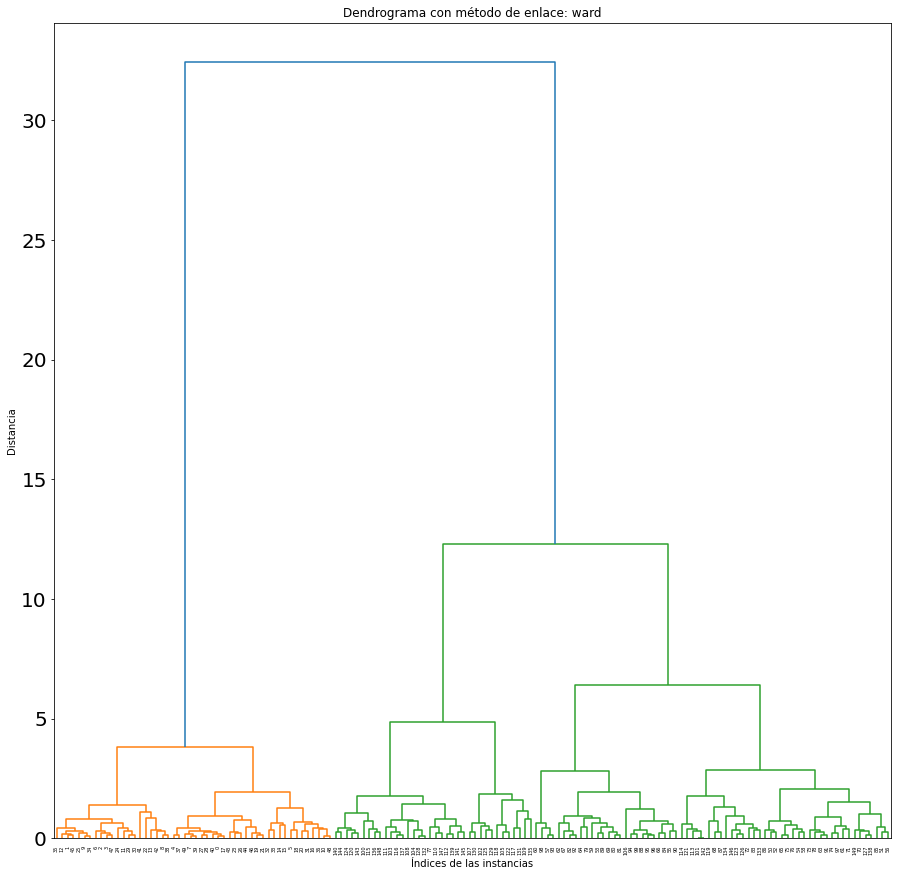

In [3]:
methods = ['single', 'complete', 'average', 'ward']
for method in methods:
    linkage_matrix = linkage(X, method)
    plt.figure(figsize=(15,15))
    dendrogram(linkage_matrix)
    plt.title("Dendrograma con método de enlace: {}".format(method))
    plt.xlabel("Índices de las instancias")
    plt.ylabel("Distancia")
    plt.yticks(fontsize=20)
    plt.show()


Para n_clusters = 2 El índice silhouette promedio es: 0.6867
Para n_clusters = 3 El índice silhouette promedio es: 0.5543
Para n_clusters = 4 El índice silhouette promedio es: 0.489
Para n_clusters = 5 El índice silhouette promedio es: 0.4844
Para n_clusters = 6 El índice silhouette promedio es: 0.3592


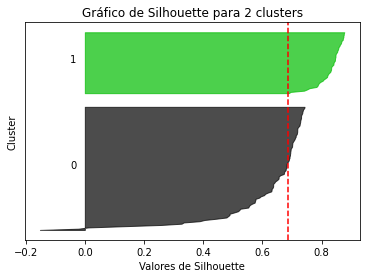

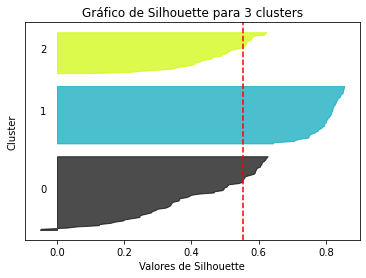

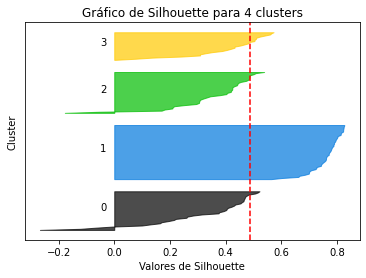

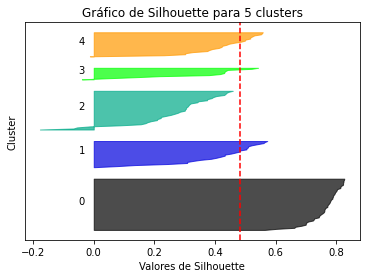

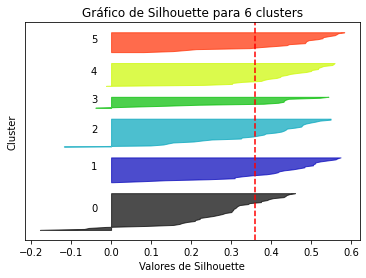

In [4]:
silhouette_scores = []

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(6, 4)

    model = AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(X)

    labels = model.labels_

    silhouette_avg = round(silhouette_score(X, labels),4)
    silhouette_scores.append(silhouette_avg)
    print("Para n_clusters =", n_clusters, "El índice silhouette promedio es:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10

    ax1.set_title("Gráfico de Silhouette para {} clusters".format(n_clusters))
    ax1.set_xlabel("Valores de Silhouette")
    ax1.set_ylabel("Cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])

plt.show()


Text(0.5, 1.0, 'Elbow Method: Silhouette Score')

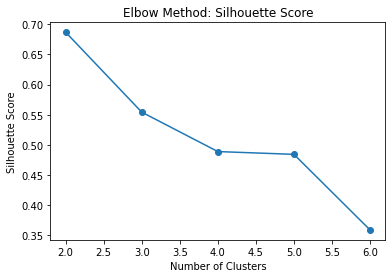

In [5]:
fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, marker='o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Elbow Method: Silhouette Score')

Numero de clusters: 2

In [19]:
model = AgglomerativeClustering(n_clusters=2)
model.fit(X)

labels = model.labels_

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


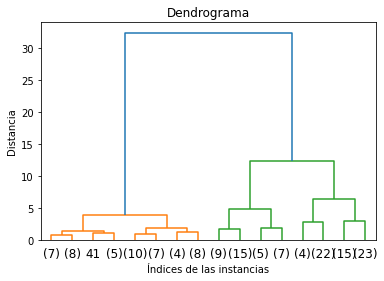

In [20]:
linkage_matrix = linkage(X, "ward")
dendrogram(linkage_matrix, truncate_mode="level", p=3)

plt.title("Dendrograma")
plt.xlabel("Índices de las instancias")
plt.ylabel("Distancia")
plt.show()

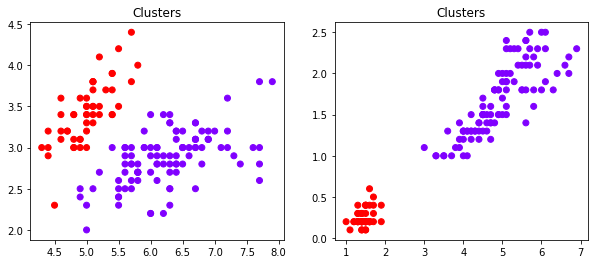

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
ax[0].set_title('Clusters')

ax[1].scatter(X[:, 2], X[:, 3], c=labels, cmap='rainbow')
ax[1].set_title('Clusters')

plt.show()